No handles with labels found to put in legend.


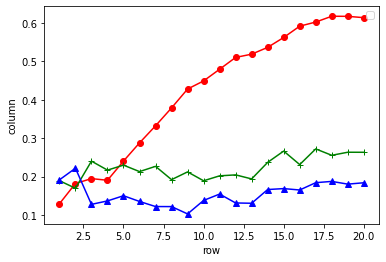

0.2391304347826087	0.0	0.0	0.0	0.0	0.0	0.20869565217391306	0.06397515527950311	0.22176470588235292


,train_label,train_precision,train_recall,train_f1-score,train_support,valid_precision,valid_recall,valid_f1-score,valid_support,test_precision,test_recall,test_f1-score,test_support
9,0.0,0.535484,0.151460,0.236131,548,0.470588,0.148148,0.225352,54,0.578947,0.150685,0.239130,73
10,1.0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0
11,2.0,0.222222,0.080000,0.117647,325,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0
12,3.0,0.000000,0.000000,0.000000,6,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0
13,4.0,0.003454,0.666667,0.006873,3,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0
14,5.0,0.030612,0.120000,0.048780,25,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0
15,6.0,0.370629,0.113490,0.173770,467,0.500000,0.080808,0.139130,99,0.666667,0.123711,0.208696,97
16,macro avg,0.166057,0.161660,0.083315,1374,0.138655,0.032708,0.052069,153,0.177945,0.039199,0.063975,170
17,weighted avg,0.392669,0.121543,0.181969,1374,0.489619,0.104575,0.169562,153,0.628999,0.135294,0.221765,170


In [60]:
file_name = 'New_Emotion_Mode_1_CE_Epochs_20_Batchsize_16.csv'
import pandas as pd

# choice = 'macro'
choice = 'weighted'

df = pd.read_csv(file_name)
df_plot = df[df['train_label'] == choice + ' avg']


get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import matplotlib.pyplot as plt  

num_epoch = 20
x = range(1, num_epoch + 1)

plt.plot(x,df_plot['train_f1-score'],'ro-',x,df_plot['valid_f1-score'],'g+-',x,df_plot['test_f1-score'],'b^-')

plt.xlabel('row')
plt.ylabel('column')
plt.legend()
plt.show()


end = df_plot['test_f1-score'].idxmax()
start = end - 8

if choice == 'weighted':
    pass
else:
    start += 1
    end += 1
print('\t'.join([str(i) for i in df['test_f1-score'][start:end+1]]))
df[start:end+1]

No handles with labels found to put in legend.


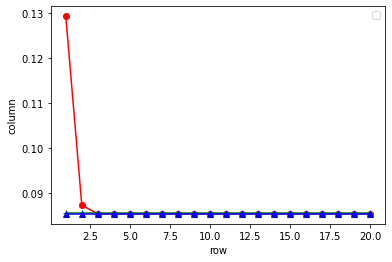

In [72]:
file_name = 'New_Emotion_Mode_1_CE_Epochs_20_Batchsize_16_.csv'
import pandas as pd

choice = 'macro'
# choice = 'weighted'

df = pd.read_csv(file_name)
df_plot = df[df['train_label'] == choice + ' avg']


get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import matplotlib.pyplot as plt  

num_epoch = 20
x = range(1, num_epoch + 1)

plt.plot(x,df_plot['train_f1-score'],'ro-',x,df_plot['valid_f1-score'],'g+-',x,df_plot['test_f1-score'],'b^-')

plt.xlabel('row')
plt.ylabel('column')
plt.legend()
plt.show()


# end = df_plot['test_f1-score'].idxmax()
# start = end - 8

# if choice == 'weighted':
#     pass
# else:
#     start += 1
#     end += 1
# print('\t'.join([str(i) for i in df['test_f1-score'][start:end+1]]))
# df[start:end+1]

No handles with labels found to put in legend.


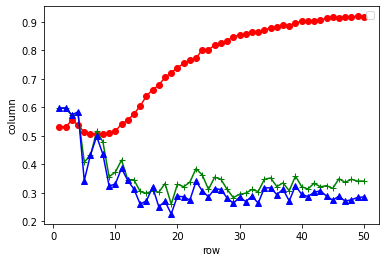

0.0	0.0	0.0	0.0	0.5969827586206897	0.0	0.0	0.08528325123152711	0.5969827586206897


,train_label,train_precision,train_recall,train_f1-score,train_support,valid_precision,valid_recall,valid_f1-score,valid_support,test_precision,test_recall,test_f1-score,test_support
0,0.0,0.051799,0.178218,0.080268,202,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0
1,1.0,0.000000,0.000000,0.000000,73,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0
2,2.0,0.002538,0.066667,0.004890,15,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0
3,3.0,0.020879,0.158333,0.036893,120,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0
4,4.0,0.910428,0.424211,0.578754,4816,1.000000,0.426621,0.598086,586,1.000000,0.425499,0.596983,651
5,5.0,0.007500,0.088235,0.013825,34,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0
6,6.0,0.003891,0.153846,0.007590,13,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0
7,macro avg,0.142434,0.152787,0.103174,5273,0.142857,0.060946,0.085441,586,0.142857,0.060786,0.085283,651
8,weighted avg,0.834048,0.399014,0.532630,5273,1.000000,0.426621,0.598086,586,1.000000,0.425499,0.596983,651


In [54]:
file_name = 'New_Emotion_Mode_1_CE_Epochs_50_Batchsize_16.csv'
import pandas as pd

# choice = 'macro'
choice = 'weighted'

df = pd.read_csv(file_name)
df_plot = df[df['train_label'] == choice + ' avg']


get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import matplotlib.pyplot as plt  

num_epoch = 50
x = range(1, num_epoch + 1)

plt.plot(x,df_plot['train_f1-score'],'ro-',x,df_plot['valid_f1-score'],'g+-',x,df_plot['test_f1-score'],'b^-')

plt.xlabel('row')
plt.ylabel('column')
plt.legend()
plt.show()


end = df_plot['test_f1-score'].idxmax()
start = end - 8

if choice == 'weighted':
    pass
else:
    start += 1
    end += 1
print('\t'.join([str(i) for i in df['test_f1-score'][start:end+1]]))
df[start:end+1]

In [49]:
import torch.nn as nn
import torch
f = nn.Softmax(dim=0)
emos = torch.FloatTensor([2340 , 376 , 1346 , 3533 , 8701 , 1345 , 1889],
                    )

emos = 1000.0/emos
emos = emos
print(emos)
print(f(emos)*10)


tensor([0.4274, 2.6596, 0.7429, 0.2830, 0.1149, 0.7435, 0.5294])
tensor([0.6342, 5.9110, 0.8695, 0.5490, 0.4640, 0.8700, 0.7023])
